In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load the cleaned Olympics dataset
data = pd.read_csv("olympics_cleaned.csv")

In [20]:
# Rename columns for better readability 
data.rename(columns = {
    "isim" : "name",
    "cinsiyet" : "sex",
    "yas" : "age",
    "boy" : "height",
    "kilo" : "weight",
    "takim" : "team",
    "uok": "noc", # National Olympic Committee
    "yil" : "year",
    "sezon" :"season",
    "sehir" : "city",
    "spor" : "sport",
    "etkinlik" : "event",
    "madalya" : "medal"
    }, inplace = True)
data.head()

,name,sex,age,height,weight,team,noc,year,season,city,sport,event,medal
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [21]:
# Univariate data analysis 
# Visualizing categorical variables
# Define a function to plot the bar chart for a given variable
def plotbar(variable, n = 5): # Visualize at most 5 categories
    data_ = data[variable]
    data_count = data_.value_counts()  # Count occurrences of each category
    data_count = data_count[:n]  # Take the top 'n' categories

    plt.figure(figsize=(6,2))
    plt.bar(data_count.index, data_count, color = "green")
    plt.xticks(data_count.index, data_count.index.values)
    plt.xticks(rotation = 43) # Rotate x-axis labels for better visibility
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency: {variable}")
    plt.show()
    print(f"{data_count}")

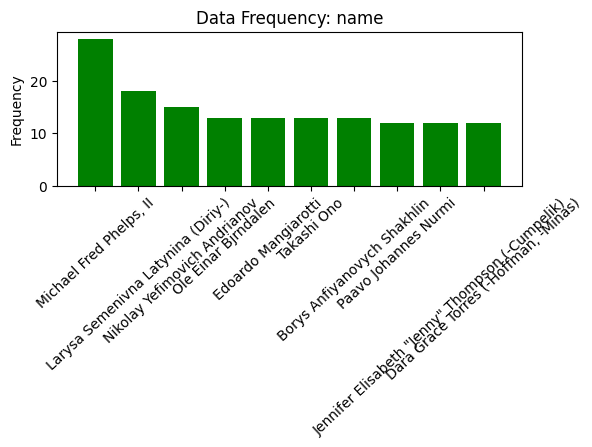

name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Edoardo Mangiarotti                                13
Takashi Ono                                        13
Borys Anfiyanovych Shakhlin                        13
Paavo Johannes Nurmi                               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Dara Grace Torres (-Hoffman, -Minas)               12
Name: count, dtype: int64


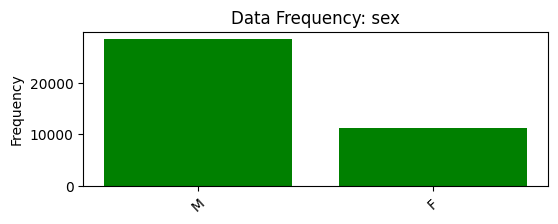

sex
M    28530
F    11253
Name: count, dtype: int64


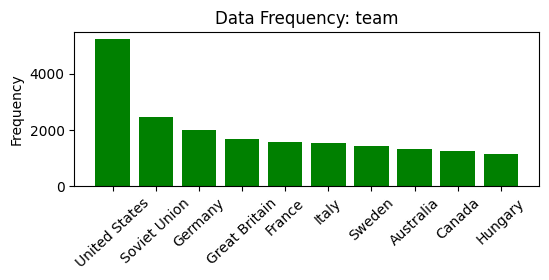

team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: count, dtype: int64


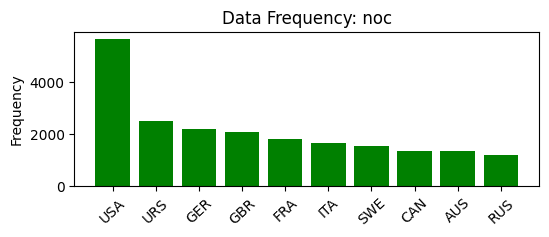

noc
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: count, dtype: int64


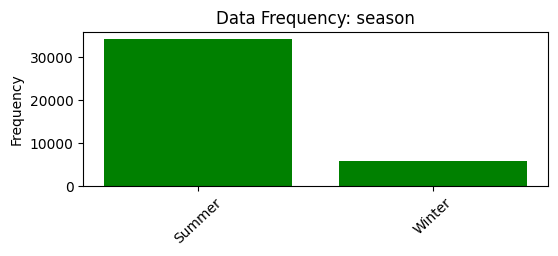

season
Summer    34088
Winter     5695
Name: count, dtype: int64


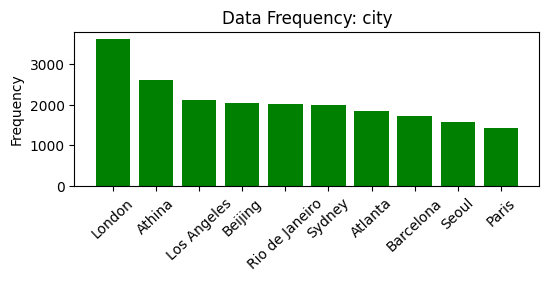

city
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Sydney            2004
Atlanta           1842
Barcelona         1712
Seoul             1582
Paris             1436
Name: count, dtype: int64


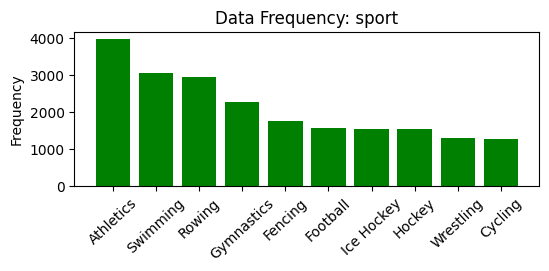

sport
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Football      1571
Ice Hockey    1530
Hockey        1528
Wrestling     1296
Cycling       1263
Name: count, dtype: int64


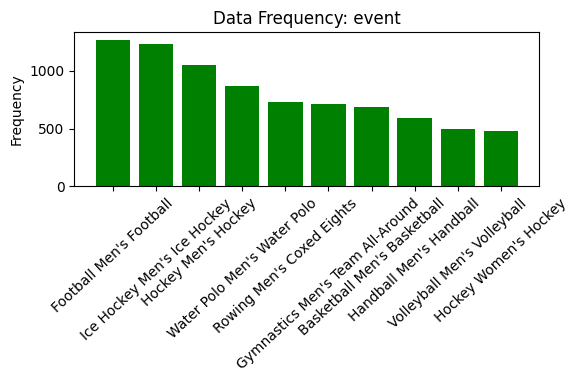

event
Football Men's Football             1269
Ice Hockey Men's Ice Hockey         1230
Hockey Men's Hockey                 1050
Water Polo Men's Water Polo          866
Rowing Men's Coxed Eights            730
Gymnastics Men's Team All-Around     713
Basketball Men's Basketball          687
Handball Men's Handball              588
Volleyball Men's Volleyball          495
Hockey Women's Hockey                478
Name: count, dtype: int64


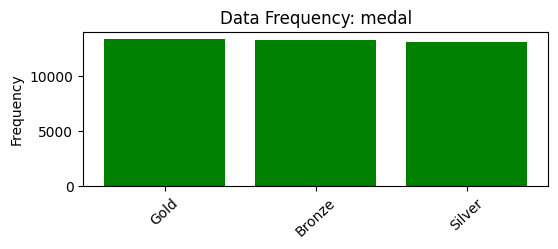

medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [ ]:
# Identify categorical columns in the dataset
categorical_columns = data.select_dtypes(include= ["object"]).columns
# Plot bar charts for all categorical variables
for variable in categorical_columns:
    plotbar(variable, 10)

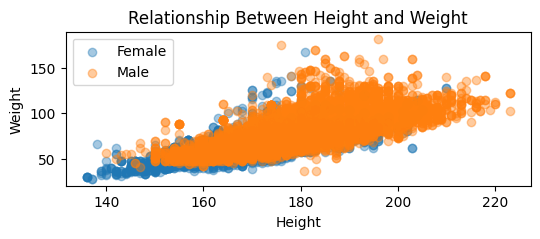

In [ ]:
# Bivariate analysis: Compare height and weight by gender
male = data[data.sex == "M"]
female = data[data.sex == "F"]

plt.figure(figsize=(6,2))
plt.scatter(female.height, female.weight, alpha = 0.4, label = "Female")
plt.scatter(male.height, male.weight, alpha = 0.4, label = "Male")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relationship Between Height and Weight")
plt.legend()

In [25]:
# Calculate correlation between numeric variables
numeric_correlation = data.loc[:, ["age", "height", "weight"]].corr() # correlation calculation
numeric_correlation

,age,height,weight
age,1.000000,0.061890,0.136349
height,0.061890,1.000000,0.794368
weight,0.136349,0.794368,1.000000


In [ ]:
data_temp = data.copy()
# Add dummy variables for medals to analyze correlations with age
# get_dummies() converts categorical values ​​to numeric (dummy variable)
data_temp = pd.get_dummies(data_temp, columns=["medal"])
# Correlation between age and medal types
numeric_correlation_age_medal = data_temp.loc[:, ["age", "medal_Bronze", "medal_Gold", "medal_Silver"]].corr()
numeric_correlation_age_medal

,age,medal_Bronze,medal_Gold,medal_Silver
age,1.000000,-0.005584,-0.002576,0.008192
medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [ ]:
# Count medals by teams (groupby)
groupby_team = data_temp[["team", "medal_Bronze", "medal_Gold", "medal_Silver"]].groupby(["team"], as_index=False).sum()
# as. index yapmazsak takımı direkt index yapar. genelde yapmamak daha iyi takımı feature olarak gösterir
groupby_team_sorted = groupby_team.sort_values(by = "medal_Gold", ascending=False)
groupby_team_sorted_20 = groupby_team_sorted[:20]
groupby_team_sorted_20

,team,medal_Bronze,medal_Gold,medal_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [ ]:
# Replace 'Soviet Union' with 'Russia' for consistency
data_temp["team"] = data_temp["team"].replace({
    "Soviet Union": "Russia"
})

groupby_team = data_temp[["team", "medal_Bronze", "medal_Gold", "medal_Silver"]].groupby(["team"], as_index=False).sum()
groupby_team_sorted = groupby_team.sort_values(by = "medal_Gold", ascending=False)
groupby_team_sorted_20 = groupby_team_sorted[:20]
groupby_team_sorted_20

,team,medal_Bronze,medal_Gold,medal_Silver
461,United States,1233,2474,1512
364,Russia,1070,1424,1067
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
419,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [30]:
# Filter data for Turkey
turkey = groupby_team.query("team == 'Turkey'")
turkey

,team,medal_Bronze,medal_Gold,medal_Silver
448,Turkey,28,40,27


In [ ]:
# Count medals by city
groupby_city = data_temp[["city", "medal_Bronze", "medal_Gold", "medal_Silver"]].groupby(["city"], as_index=False).sum()
groupby_city_sorted = groupby_city.sort_values(by = "medal_Gold", ascending=False)
groupby_city_sorted_20 = groupby_city_sorted[:20]
groupby_city_sorted_20

,city,medal_Bronze,medal_Gold,medal_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


In [33]:
# Analyze medals by gender
groupby_sex = data_temp[["sex", "medal_Bronze", "medal_Gold", "medal_Silver"]].groupby(["sex"], as_index=False).sum()
groupby_sex_sorted = groupby_sex.sort_values(by = "medal_Gold", ascending=False)
groupby_sex_sorted_20 = groupby_sex_sorted[:20]
groupby_sex_sorted_20

,sex,medal_Bronze,medal_Gold,medal_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


In [ ]:
# Multivariate analysis: Create a pivot table for medals, gender, and physical attributes

data_pivot = data.pivot_table(index="medal",
                              columns="sex",
                              values=["height", "weight", "age"],
                              aggfunc={
                                  "height": np.mean,
                                  "weight": [np.median, np.max],
                                  "age": [np.min, np.max, np.std]
                              })
data_pivot

/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_36063/4172133031.py:6: FutureWarning: The provided callable <function mean at 0x107a2c2c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_pivot = data.pivot_table(index="medal",
/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_36063/4172133031.py:6: FutureWarning: The provided callable <function median at 0x107b89e40> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  data_pivot = data.pivot_table(index="medal",
/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_36063/4172133031.py:6: FutureWarning: The provided callable <function max at 0x107a0f880> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used dir

age                                            height              \
         max         min             std                  mean               
sex        F     M     F     M         F         M           F           M   
medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

       weight                       
          max        median         
sex         F      M      F      M  
medal                               
Bronze  141.0  182.0   62.0  76.00  
Gold    136.0  170.0   63.0  76.58  
Silver  167.0  154.0   62.0  76.00

In [ ]:
# Analyze medals by team, city, gender, and seas
data_team_pivot = data_temp.pivot_table(
    index = ["team", "city"],
    columns= ["sex", "season"],
    values = ["medal_Bronze", "medal_Gold", "medal_Silver"],
    aggfunc={
        "medal_Gold": [np.sum], 
        "medal_Silver": [np.sum], 
        "medal_Bronze": [np.sum]
    }
)
data_team_pivot
# we have a problem in here. when adding here the values ​​are not handled properly so the following should be done

/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_36063/3785335065.py:2: FutureWarning: The provided callable <function sum at 0x107a0ee80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_team_pivot = data_temp.pivot_table(
/var/folders/3r/lc8c1b_x0jz2cc2p36rfzzrm0000gn/T/ipykernel_36063/3785335065.py:2: FutureWarning: The provided callable <function sum at 0x107a0ee80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_team_pivot = data_temp.pivot_table(


medal_Bronze                       \
                                           sum                        
sex                                          F             M          
season                                  Summer Winter Summer Winter   
team                  city                                            
A North American Team Paris                NaN    NaN    4.0    NaN   
Afghanistan           Beijing              NaN    NaN    1.0    NaN   
                      London               NaN    NaN    1.0    NaN   
Algeria               Atlanta              NaN    NaN    1.0    NaN   
                      Barcelona            0.0    NaN    1.0    NaN   
...                                        ...    ...    ...    ...   
Zambia                Los Angeles          NaN    NaN    1.0    NaN   
Zimbabwe              Athina               1.0    NaN    NaN    NaN   
                      Beijing              0.0    NaN    NaN    NaN   
                      Moskva               0.0    NaN    NaN    NaN   
Zut                   London               NaN    NaN    0.0    NaN   

                                  medal_Gold                       \
                                         sum                        
sex                                        F             M          
season                                Summer Winter Summer Winter   
team                  city                                          
A North American Team Paris              NaN    NaN    0.0    NaN   
Afghanistan           Beijing            NaN    NaN    0.0    NaN   
                      London             NaN    NaN    0.0    NaN   
Algeria               Atlanta            NaN    NaN    2.0    NaN   
                      Barcelona          1.0    NaN    0.0    NaN   
...                                      ...    ...    ...    ...   
Zambia                Los Angeles        NaN    NaN    0.0    NaN   
Zimbabwe              Athina             1.0    NaN    NaN    NaN   
                      Beijing            1.0    NaN    NaN    NaN   
                      Moskva            15.0    NaN    NaN    NaN   
Zut                   London             NaN    NaN    0.0    NaN   

                                  medal_Silver                       
                                           sum                       
sex                                          F             M         
season                                  Summer Winter Summer Winter  
team                  city                                           
A North American Team Paris                NaN    NaN    0.0    NaN  
Afghanistan           Beijing              NaN    NaN    0.0    NaN  
                      London               NaN    NaN    0.0    NaN  
Algeria               Atlanta              NaN    NaN    0.0    NaN  
                      Barcelona            0.0    NaN    0.0    NaN  
...                                        ...    ...    ...    ...  
Zambia                Los Angeles          NaN    NaN    0.0    NaN  
Zimbabwe              Athina               1.0    NaN    NaN    NaN  
                      Beijing              3.0    NaN    NaN    NaN  
                      Moskva               0.0    NaN    NaN    NaN  
Zut                   London               NaN    NaN    3.0    NaN  

[2069 rows x 12 columns]

In [ ]:
# Add a 'total' column to the pivot table and sort by total medals
data_team_pivot["total"] = (
    data_team_pivot["medal_Gold"].sum(axis=1) +
    data_team_pivot["medal_Silver"].sum(axis=1) +
    data_team_pivot["medal_Bronze"].sum(axis=1) 
)
data_team_pivot = data_team_pivot.sort_values(by="total", ascending=False)[:100]
data_team_pivot

medal_Bronze                      medal_Gold  \
                                      sum                             sum   
sex                                     F             M                 F   
season                             Summer Winter Summer Winter     Summer   
team          city                                                          
United States Los Angeles            28.0    NaN   83.0    NaN       88.0   
              London                 36.0    NaN   56.0    NaN      107.0   
Russia        Moskva                 39.0    NaN   87.0    NaN       63.0   
Great Britain London                 26.0    NaN   68.0    NaN       21.0   
United States Beijing                23.0    NaN   55.0    NaN       54.0   
...                                   ...    ...    ...    ...        ...   
Italy         Roma                    6.0    NaN   25.0    NaN        0.0   
              Antwerpen               NaN    NaN    8.0    NaN        NaN   
Netherlands   Athina                 19.0    NaN    8.0    NaN        3.0   
Australia     Rio de Janeiro          5.0    NaN   20.0    NaN       20.0   
China         Athina                  8.0    NaN    5.0    NaN       29.0   

                                                  medal_Silver                \
                                                           sum                 
sex                                      M                   F             M   
season                       Winter Summer Winter       Summer Winter Summer   
team          city                                                             
United States Los Angeles       NaN  165.0    NaN         52.0    NaN  106.0   
              London            NaN  146.0    NaN         32.0    NaN   69.0   
Russia        Moskva            NaN  124.0    NaN         37.0    NaN   92.0   
Great Britain London            NaN   99.0    NaN         19.0    NaN  115.0   
United States Beijing           NaN   67.0    NaN         81.0    NaN   29.0   
...                             ...    ...    ...          ...    ...    ...   
Italy         Roma              NaN   36.0    NaN          0.0    NaN   18.0   
              Antwerpen         NaN   67.0    NaN          NaN    NaN    9.0   
Netherlands   Athina            NaN    1.0    NaN         19.0    NaN   33.0   
Australia     Rio de Janeiro    NaN    3.0    NaN         14.0    NaN   20.0   
China         Athina            NaN   13.0    NaN         18.0    NaN    9.0   

                                     total  
                                            
sex                                         
season                       Winter         
team          city                          
United States Los Angeles       NaN  522.0  
              London            NaN  446.0  
Russia        Moskva            NaN  442.0  
Great Britain London            NaN  348.0  
United States Beijing           NaN  309.0  
...                             ...    ...  
Italy         Roma              NaN   85.0  
              Antwerpen         NaN   84.0  
Netherlands   Athina            NaN   83.0  
Australia     Rio de Janeiro    NaN   82.0  
China         Athina            NaN   82.0  

[100 rows x 13 columns]

In [54]:
# Save the pivot table to an Excel file
data_team_pivot.to_excel("data_team_pivot.xlsx")

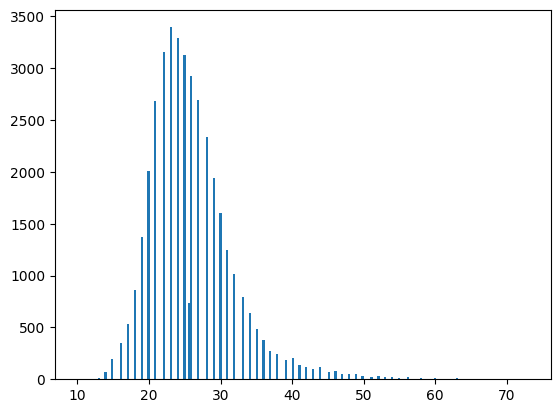

In [ ]:
# Outlier detection for the 'age' variable
age = data.age
plt.hist(age, bins =200)
plt.show()

In [41]:
Q1 = np.percentile(age, 25) # First quartile
print(Q1)

22.0


In [42]:
Q3 = np.percentile(age, 75) # Third quartile
print(Q3)

29.0


In [43]:
IQR = Q3 - Q1 # Interquartile range
print(IQR)

7.0


In [44]:
# Define upper and lower bounds for outliers
outlier_step = 1.5 * IQR
upper_level = Q3 + outlier_step
lower_level = Q1 - outlier_step
print(upper_level)
print(lower_level)

39.5
11.5


In [45]:
outlier_list_col = age[(age < lower_level) | (age > upper_level)]
print(outlier_list_col)

192      45.0
228      47.0
262      44.0
268      41.0
382      41.0
         ... 
39151    40.0
39278    43.0
39337    40.0
39622    46.0
39670    40.0
Name: age, Length: 1230, dtype: float64


In [46]:
# Function for anomaly detection
from collections import Counter

In [47]:

def anomalyDetect(df, feature = ["age", "weight", "height"]):
    outlier_indices = []
    for c in feature:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        upper_level = Q3 + outlier_step
        lower_level = Q1 - outlier_step
        outlier_list_col = df[(df[c] < lower_level) | (df[c] > upper_level)].index
        outlier_indices.extend(outlier_list_col)
# Count occurrences of each index 
    outlier_indices = Counter(outlier_indices)
# Return indices that are outliers in more than one feature
    outliers = list(i for i,v in outlier_indices.items() if v > 1)
    return outliers
        

In [ ]:
# Detect anomalies and analyze their distribution
data_anomaly = data.loc[anomalyDetect(data,["age", "weight", "height"])]
anomaly_sport = data_anomaly.sport.value_counts()
anomaly_event = data_anomaly.event.value_counts()

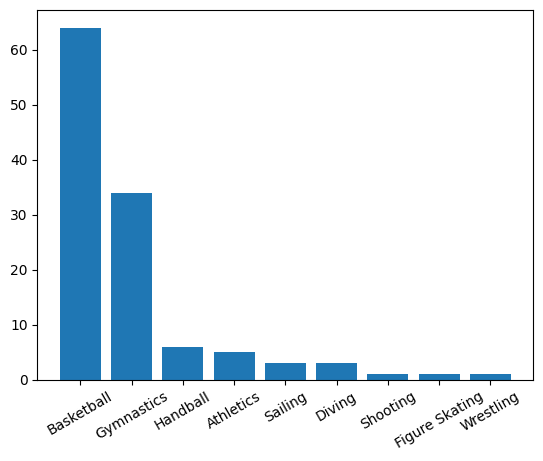

In [55]:
# Visualize sports with anomalies
plt.figure()
plt.bar(anomaly_sport.index, anomaly_sport.values)
plt.xticks(rotation = 30)
plt.show()

In [ ]:
# Remove anomalies from the dataset
anomaly_index_list = data_anomaly.index.to_list()
data_cleaned = data.drop(index=anomaly_index_list)

,name,sex,age,height,weight,team,noc,year,season,city,sport,event,medal
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
39779,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
39780,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
39781,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
